# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Reading csv and Exploring the dataset

In [2]:
d1=pd.read_csv('/Users/srujithadevineni/research/alzehmeirs_detection/Dataset_numerical/oasis_longitudinal.csv')
d1.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
d2=pd.read_csv('/Users/srujithadevineni/research/alzehmeirs_detection/Dataset_numerical/oasis_cross-sectional.csv')
d2.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [4]:
d2.ID.isnull().sum()

0

In [5]:
d1[['MRI ID']].isnull().sum()

MRI ID    0
dtype: int64

In [6]:
d2.shape

(436, 12)

In [7]:
d1.shape

(373, 15)

In [8]:
d2.ID.nunique()

436

In [9]:
d1[['MRI ID']].nunique()

MRI ID    373
dtype: int64

In [10]:
d1

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [11]:
d1.Group.unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

# Check missing values by each column

In [12]:
pd.isnull(d1).sum() 

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

# Filled null value with column median

In [13]:
d1["SES"].fillna(d1["SES"].median(), inplace=True)
d1["MMSE"].fillna(d1["MMSE"].median(), inplace=True)

# Bar-graph showing how many people have Alzheimer
## *same person visits two or more time so we take the single visit data

(0.7098039215686275, 0.9419607843137255, 0.5419607843137255)


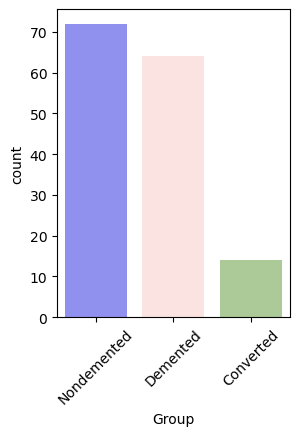

In [14]:
# sns.set_style("whitegrid")
ex_d1 = d1.loc[d1['Visit'] == 1]
palette=sns.color_palette("terrain")
custom_palette = ["#8080FF", "#FFDFDE", "#A9D28E"]
plt.figure(figsize=(3,4))
sns.countplot(x='Group', data=ex_d1,palette=custom_palette,linewidth=0.5)
plt.xticks(rotation=45)
print(palette[2])

/var/folders/gj/gyy0sxs96ns46ccr129t75_w0000gn/T/ipykernel_98205/1036109312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_d1['Group'] = ex_d1['Group'].replace(['Converted'], ['Demented'])


<Axes: xlabel='Group', ylabel='count'>

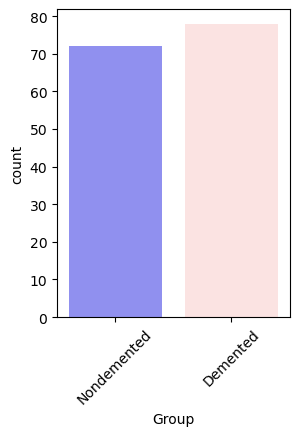

In [15]:
ex_d1['Group'] = ex_d1['Group'].replace(['Converted'], ['Demented'])
d1['Group'] = d1['Group'].replace(['Converted'], ['Demented'])
plt.figure(figsize=(3,4))
custom_palette = ["#8080FF", "#FFDFDE", "#8e883d"]
plt.xticks(rotation=45)
sns.countplot(x='Group', data=ex_d1,palette=custom_palette,linewidth=0.1)

# Bar-graph showing Male vs female demented rate  

              M   F
Demented     40  38
Nondemented  22  50


Text(0.5, 1.0, 'Gender and Demented rate')

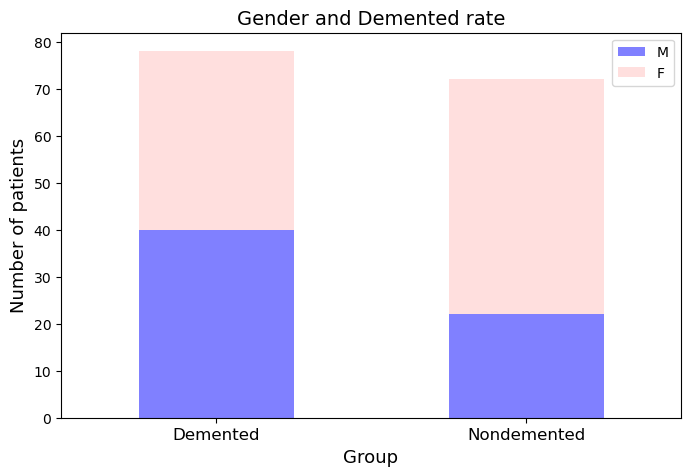

In [16]:
# bar drawing function
custom_palette = ["#8080FF", "#FFDFDE", "#A9D28E"]
def bar_chart(feature):
    Demented = ex_d1[ex_d1['Group']=='Demented'][feature].value_counts()
    Nondemented = ex_d1[ex_d1['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5),color=custom_palette)
    print(df_bar)
                
                
# Gender  and  Group ( Female=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

# Relationship Between Education Years and Dementia


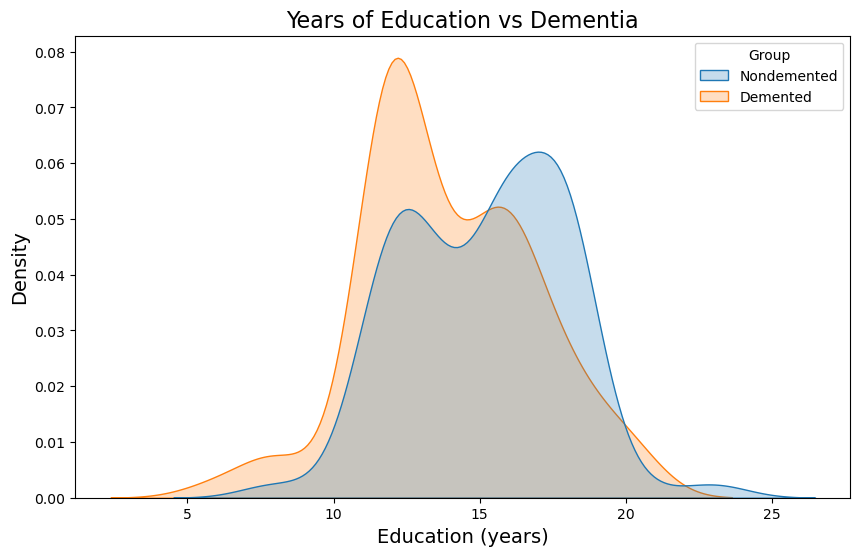

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ex_d1, x='EDUC', hue='Group', fill=True)
plt.title('Years of Education vs Dementia', size=16)
plt.xlabel('Education (years)', size=14)
plt.ylabel('Density', size=14)
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [19]:
#convet the charecter data into numeric
group_map = {"Demented": 1, "Nondemented": 0}

d1['Group'] = d1['Group'].map(group_map)
d1['M/F'] = d1['M/F'].replace(['F','M'], [0,1])

# spliting data into train(80percent) and test(20percent)

In [20]:
from sklearn.model_selection import train_test_split

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = d1[feature_col_names].values
y = d1[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Confusion Metrics Table

In [21]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), color='black')
    plt.show()

# Roc curve

In [22]:
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

total_fpr = {}
total_tpr = {}
def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)
    total_fpr[str((str(model).split('(')[0]))] = fpr
    total_tpr[str((str(model).split('(')[0]))] = tpr
    plt.figure()
    plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Accuracy code

In [23]:
total_accuracy = {}
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu

In [24]:
# Replace NaN values with an empty string
d1.fillna("", inplace=True)

### RandomForestClassifier



Confusion Matrix:
[[26  6]
 [10 33]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        32
           1       0.85      0.77      0.80        43

    accuracy                           0.79        75
   macro avg       0.78      0.79      0.78        75
weighted avg       0.79      0.79      0.79        75



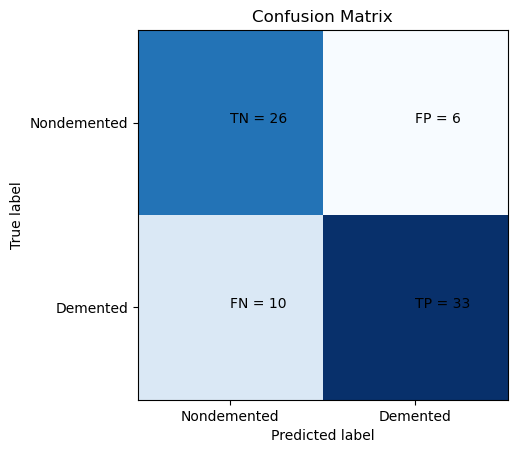

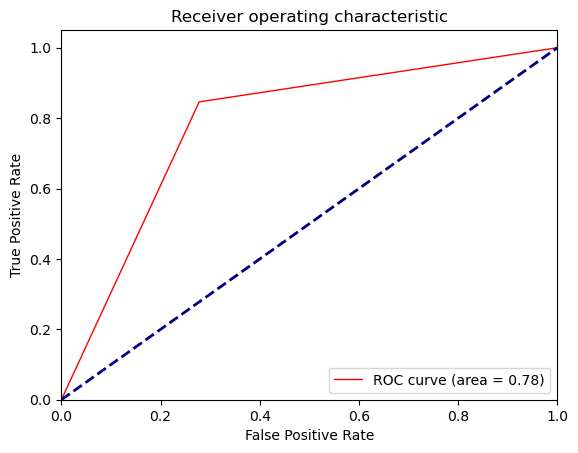


Acuuracy Of the Model:  0.7866666666666666 




In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini', max_depth=8, max_features=0.5, n_estimators=200)


param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}

#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring = 'roc_auc')
rfc.fit(X_train, y_train.ravel())
#print("Best parameters set found on development set:")
#print(rfc.best_params_)
report_performance(rfc) 
roc_curves(rfc)
accuracy(rfc)

#feat_importances = pd.Series(rfc.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

### SVM



Confusion Matrix:
[[27  5]
 [11 32]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.84      0.77        32
           1       0.86      0.74      0.80        43

    accuracy                           0.79        75
   macro avg       0.79      0.79      0.79        75
weighted avg       0.80      0.79      0.79        75



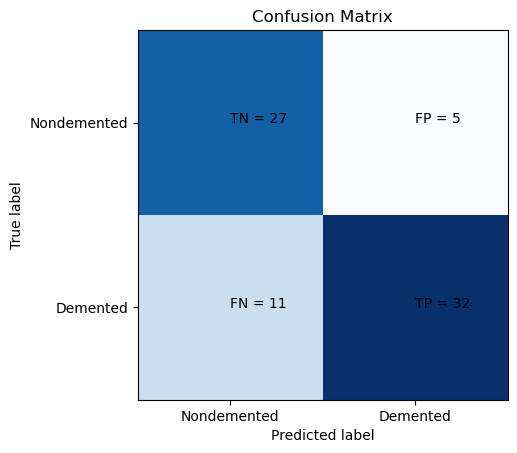

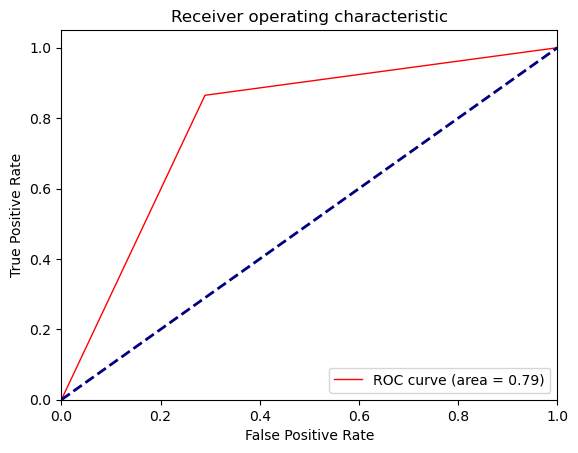


Acuuracy Of the Model:  0.7866666666666666 




In [26]:
from sklearn.svm import SVC
svm = SVC(kernel="linear", C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())
report_performance(svm) 
roc_curves(svm)
accuracy(svm)
#feat_importances = pd.Series(svm.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

### DecisionTreeClassifier



Confusion Matrix:
[[27  5]
 [17 26]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.61      0.84      0.71        32
           1       0.84      0.60      0.70        43

    accuracy                           0.71        75
   macro avg       0.73      0.72      0.71        75
weighted avg       0.74      0.71      0.71        75



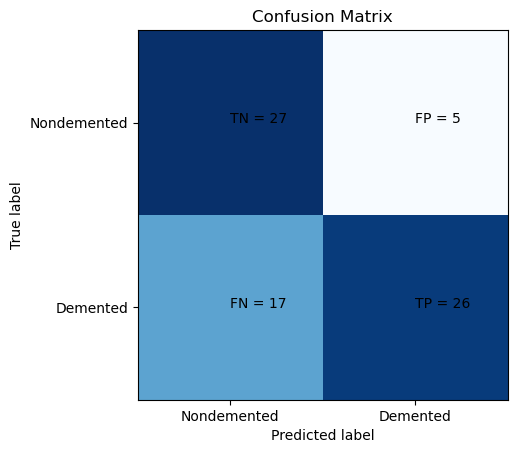

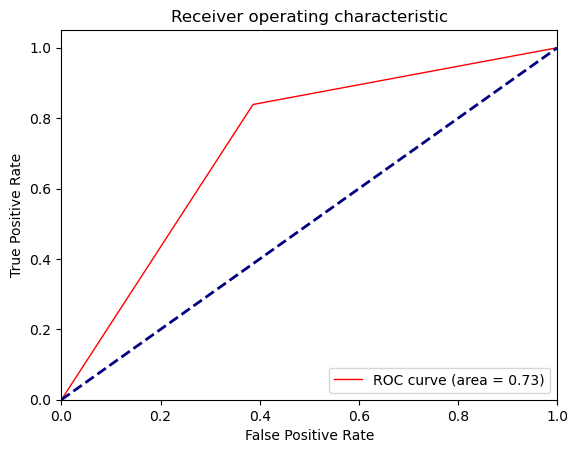


Acuuracy Of the Model:  0.7066666666666667 




In [27]:
from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf_dtc.fit(X_train, y_train.ravel())
report_performance(clf_dtc) 
roc_curves(clf_dtc)
accuracy(clf_dtc)
#importances = clf.feature_importances_


#feat_importances = pd.Series(clf_dtc.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

### XGB Classifier 



Confusion Matrix:
[[29  3]
 [ 9 34]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        32
           1       0.92      0.79      0.85        43

    accuracy                           0.84        75
   macro avg       0.84      0.85      0.84        75
weighted avg       0.85      0.84      0.84        75



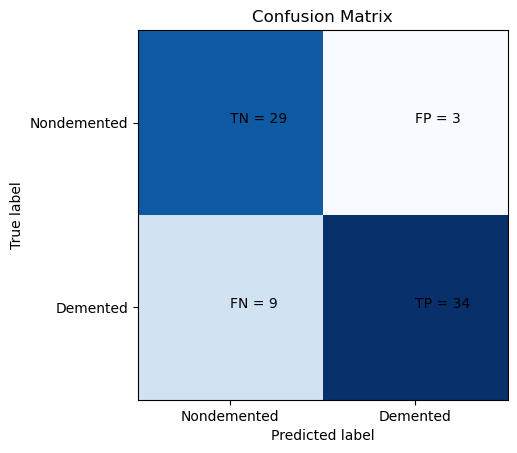

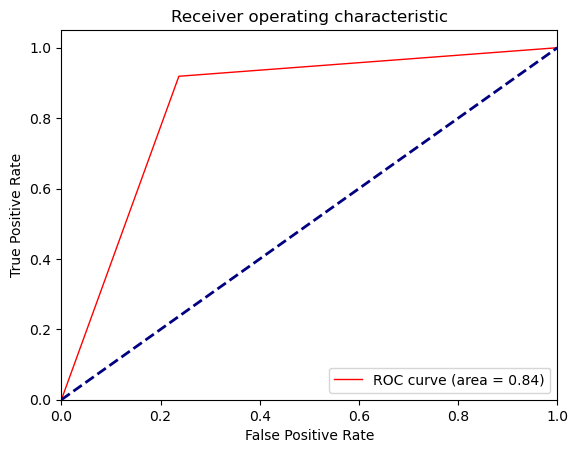


Acuuracy Of the Model:  0.84 




In [28]:
from xgboost import XGBClassifier
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4,5]
        }

clf_xgb = XGBClassifier(random_state=0)
clf_xgb.fit(X_train, y_train.ravel())
report_performance(clf_xgb) 
roc_curves(clf_xgb)
accuracy(clf_xgb)

#feat_importances = pd.Series(clf_xgb.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

### Gaussian naive_bayes classifier



Confusion Matrix:
[[27  5]
 [15 28]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.64      0.84      0.73        32
           1       0.85      0.65      0.74        43

    accuracy                           0.73        75
   macro avg       0.75      0.75      0.73        75
weighted avg       0.76      0.73      0.73        75



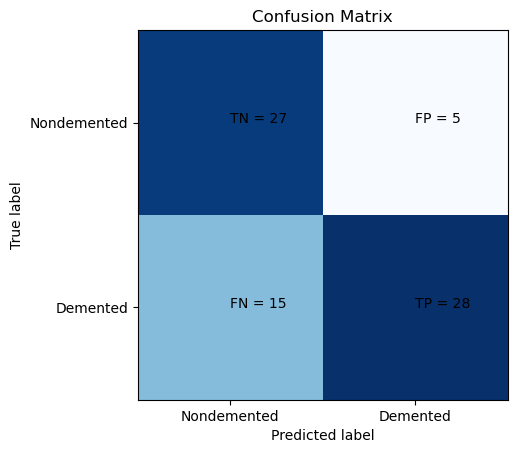

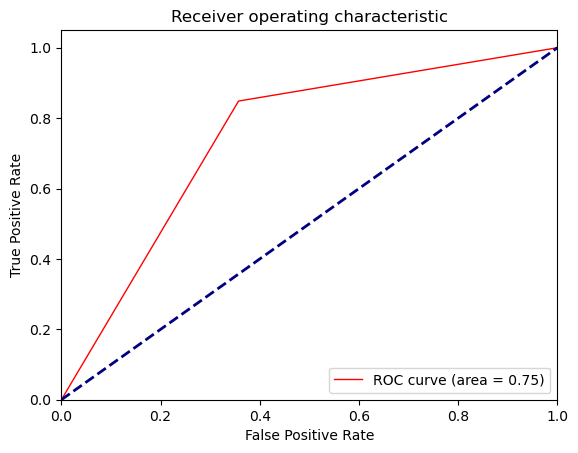


Acuuracy Of the Model:  0.7333333333333333 




In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())
report_performance(gnb) 
roc_curves(gnb)
accuracy(gnb)
#importances = clf.feature_importances_


#feat_importances = pd.Series(gnb.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

### Bernoulli naive_bayes classifier



Confusion Matrix:
[[22 10]
 [23 20]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.49      0.69      0.57        32
           1       0.67      0.47      0.55        43

    accuracy                           0.56        75
   macro avg       0.58      0.58      0.56        75
weighted avg       0.59      0.56      0.56        75



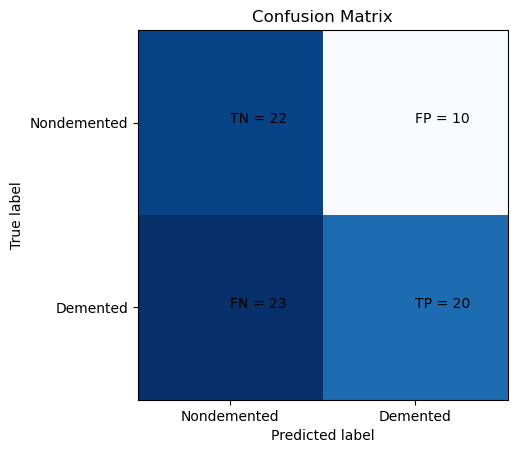

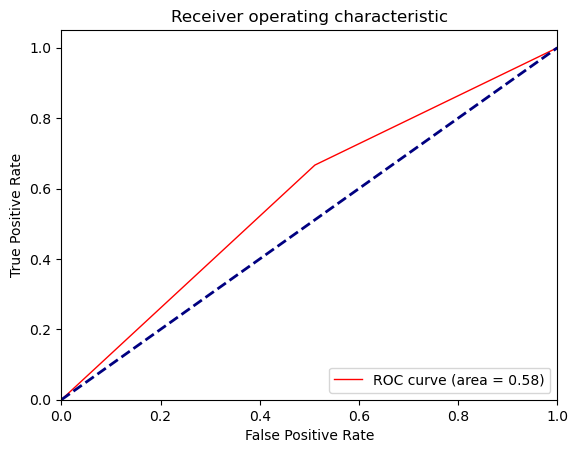


Acuuracy Of the Model:  0.56 




In [30]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train.ravel())
report_performance(clf) 
roc_curves(clf)
accuracy(clf)
#importances = clf.feature_importances_


#feat_importances = pd.Series(clf.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

### AdaBoostClassifier



Confusion Matrix:
[[28  4]
 [11 32]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        32
           1       0.89      0.74      0.81        43

    accuracy                           0.80        75
   macro avg       0.80      0.81      0.80        75
weighted avg       0.82      0.80      0.80        75



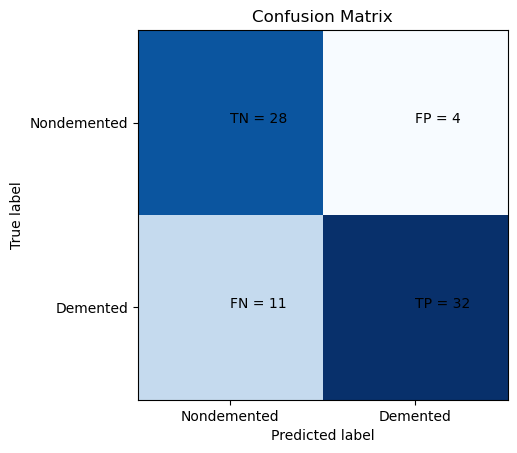

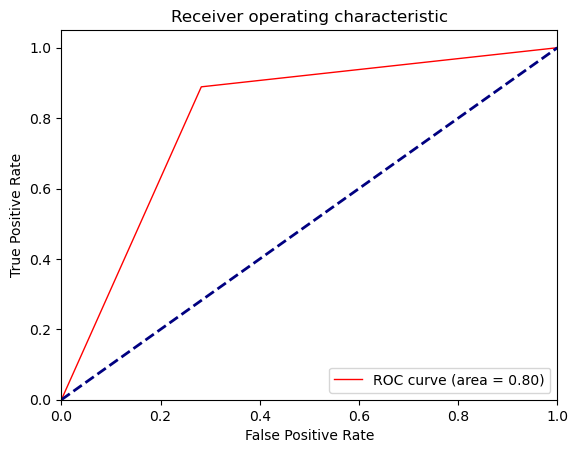


Acuuracy Of the Model:  0.8 




In [31]:
from sklearn.ensemble import AdaBoostClassifier
adb= AdaBoostClassifier(n_estimators=100, random_state=0)
adb.fit(X_train, y_train.ravel())
report_performance(adb) 
roc_curves(adb)
accuracy(adb)
#importances = clf.feature_importances_


#feat_importances = pd.Series(adb.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

### LogisticRegression



Confusion Matrix:
[[23  9]
 [18 25]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.56      0.72      0.63        32
           1       0.74      0.58      0.65        43

    accuracy                           0.64        75
   macro avg       0.65      0.65      0.64        75
weighted avg       0.66      0.64      0.64        75



/Users/srujithadevineni/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


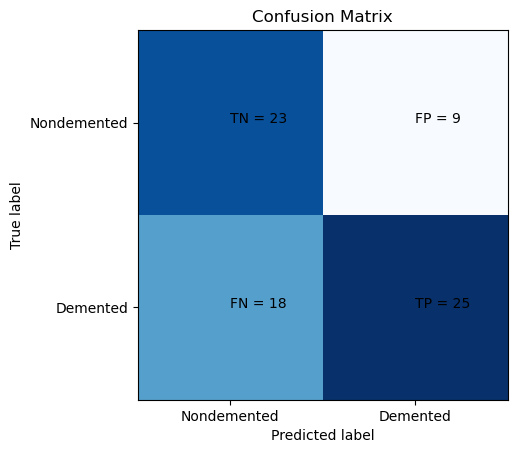

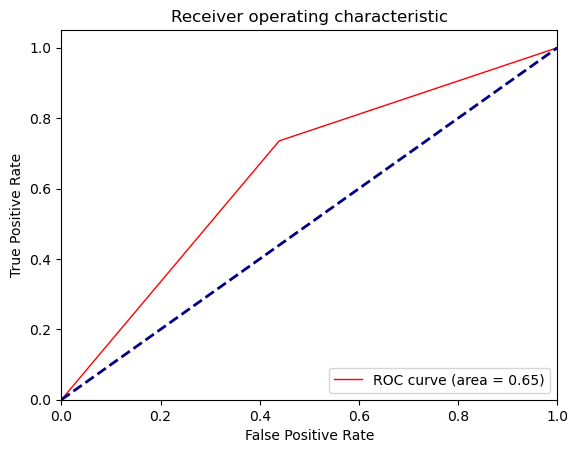


Acuuracy Of the Model:  0.64 




In [32]:
from sklearn.linear_model import LogisticRegression

logRegModel = LogisticRegression()
logRegModel.fit(X_train, y_train.ravel())
report_performance(logRegModel) 
roc_curves(logRegModel)
accuracy(logRegModel)
#importances = clf.feature_importances_


#feat_importances = pd.Series(logRegModel.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

### knn Classifier



Confusion Matrix:
[[22 10]
 [10 33]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        32
           1       0.77      0.77      0.77        43

    accuracy                           0.73        75
   macro avg       0.73      0.73      0.73        75
weighted avg       0.73      0.73      0.73        75



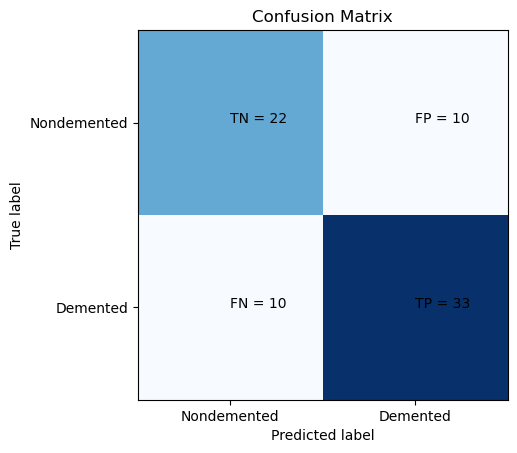

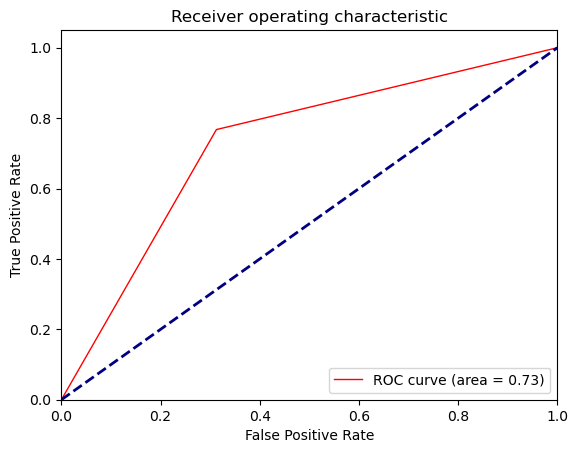


Acuuracy Of the Model:  0.7333333333333333 




In [33]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train.ravel())
report_performance(neigh) 
roc_curves(neigh)
accuracy(neigh)
#importances = clf.feature_importances_

#feat_importances = pd.Series(neigh.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

# Comparison of different Model vs Accuracy

Text(0, 0.5, 'Accuracy')

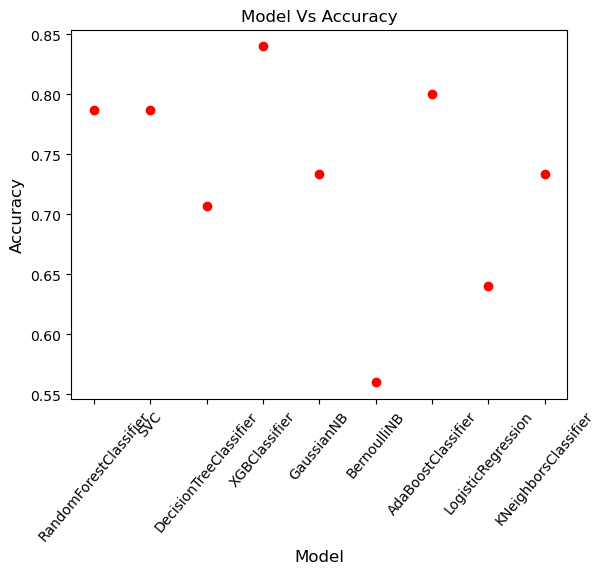

In [34]:
data = total_accuracy.values()
labels = total_accuracy.keys()


plt.plot([i for i, e in enumerate(data)], data, 'ro'); plt.xticks([i for i, e in enumerate(labels)], [l[0:25] for l in labels])
plt.title("Model Vs Accuracy",fontsize = 12)
plt.xlabel('Model',fontsize = 12)
plt.xticks(rotation = 50)
plt.ylabel('Accuracy',fontsize = 12)

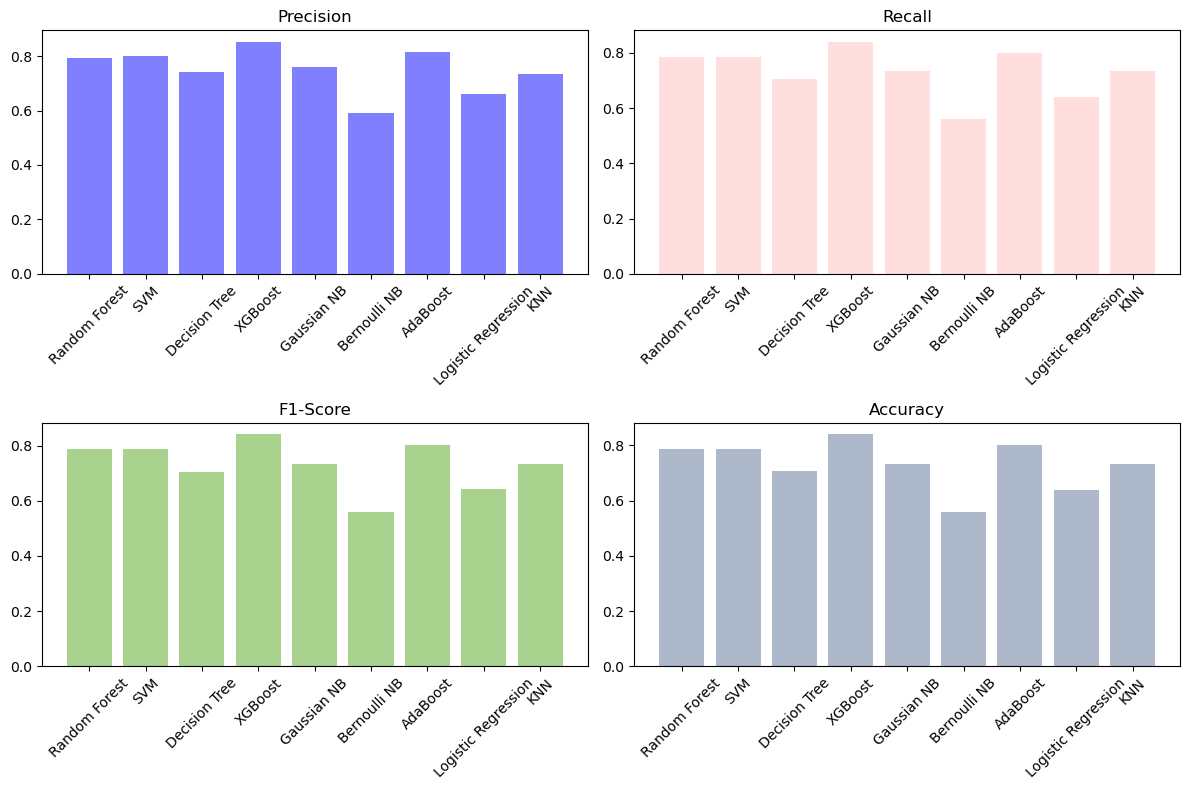

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Function to calculate precision, recall, accuracy, and f1-score
def calculate_metrics(model):
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, model.predict(X_test), average='weighted')
    acc = accuracy_score(y_test, model.predict(X_test))
    return precision, recall, f1_score, acc

# Calculate metrics for each model
models = [rfc, svm, clf_dtc, clf_xgb, gnb, clf, adb, logRegModel, neigh]
model_names = ['Random Forest', 'SVM', 'Decision Tree', 'XGBoost', 'Gaussian NB', 'Bernoulli NB', 'AdaBoost', 'Logistic Regression', 'KNN']

precisions, recalls, f1_scores, accuracies = [], [], [], []

for model in models:
    precision, recall, f1_score, acc = calculate_metrics(model)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
    accuracies.append(acc)

    

# Plotting
plt.figure(figsize=(12, 8))
custom_palette = ["#8080FF", "#FFDFDE", "#A9D28E"]
# Precision
plt.subplot(2, 2, 1)
plt.bar(model_names, precisions, color='#8080FF')
plt.xticks(rotation=45)
plt.title('Precision')

# Recall
plt.subplot(2, 2, 2)
plt.bar(model_names, recalls, color='#FFDFDE')
plt.xticks(rotation=45)
plt.title('Recall')

# F1-Score
plt.subplot(2, 2, 3)
plt.bar(model_names, f1_scores, color='#A9D28E')
plt.xticks(rotation=45)
plt.title('F1-Score')

# Accuracy
plt.subplot(2, 2, 4)
plt.bar(model_names, accuracies, color='#ADB8CB')
plt.xticks(rotation=45)
plt.title('Accuracy')

plt.tight_layout()
plt.show()


In [36]:

# Define the function to calculate precision, recall, accuracy, and f1-score
def calculate_metrics(model):
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, model.predict(X_test), average='weighted')
    acc = accuracy_score(y_test, model.predict(X_test))
    return precision, recall, f1_score, acc

# ... (your existing code)

# Save accuracy, precision, recall, and f1-score values to an Excel file
data = {
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
}

metrics_df = pd.DataFrame(data)

# Save to Excel file
metrics_df.to_excel('metrics_results.xlsx', index=False)
